In [4]:
from Devices.zaberClass import Zaber

if __name__ == "__main__":
    zaber = Zaber("COM6")
    
    print(zaber.get_current_position(0))
    print(zaber.get_current_position(1))
    print(zaber.get_current_position(2))
    # zaber.closeConnection()

Connection to stage
at port COM6


SerialPortBusyException: SerialPortBusyException: Cannot open serial port: Port is likely already opened by another application. Please close the application that is using the port.

In [5]:
zaber.check_homed()
print(zaber.get_current_position(0))
print(zaber.get_current_position(1))
print(zaber.get_current_position(2))

0.0
0.0
0.0


In [20]:
zaber.closeConnection()

In [3]:
zaber.axes[2].is_homed()

True

In [17]:
zaber.home_all()

In [ ]:
import json

with open(r"C:/Users/ryanchu/Documents/projects/zaberStage/config/JRIQT.json",'r') as f:
    config = json.load(f)
print(config)

{'logfile': 'C:/Users/ryanchu/Documents/projects/zaberStage/logfile.txt', 'Positions': {'Home': [0, 0, 0], 'Center': [50, 25, 25], 'Hypernova_Center': [50, 25, 25]}, 'Pupil_locations': {'pupil_1': [-4.5, -4.5, 0], 'pupil_2': [0, -4.5, 0], 'pupil_3': [4.5, -4.5, 0], 'pupil_4': [-4.5, 0, 0], 'pupil_5': [0, 0, 0], 'pupil_6': [4.5, 0, 0], 'pupil_7': [-4.5, 4.5, 0], 'pupil_8': [0, 4.5, 0], 'pupil_9': [4.5, 4.5, 0]}}


In [ ]:
import json
import pprint
with open(r"C:/Users/ryanchu/Documents/projects/zaberStage/config/JRIQT_recipe.json",'r') as f:
    recipes = json.load(f)
pprint.pprint(recipes)

In [ ]:
from Devices.HypernovaP1 import HypernovaP1 as HN

hn = HN("images")
hn.display_image('green.png')

Display is set to 1000 nits of brightness 

push image


Pupil
1     876.109332
2     889.690063
3     976.089615
4     905.531917
5     950.160021
6    1048.647262
7     939.009590
8    1005.344150
9    1125.195906
Name: Y, dtype: float64

Text(0.5, 1.0, 'Average luminance 3mm_aperture')

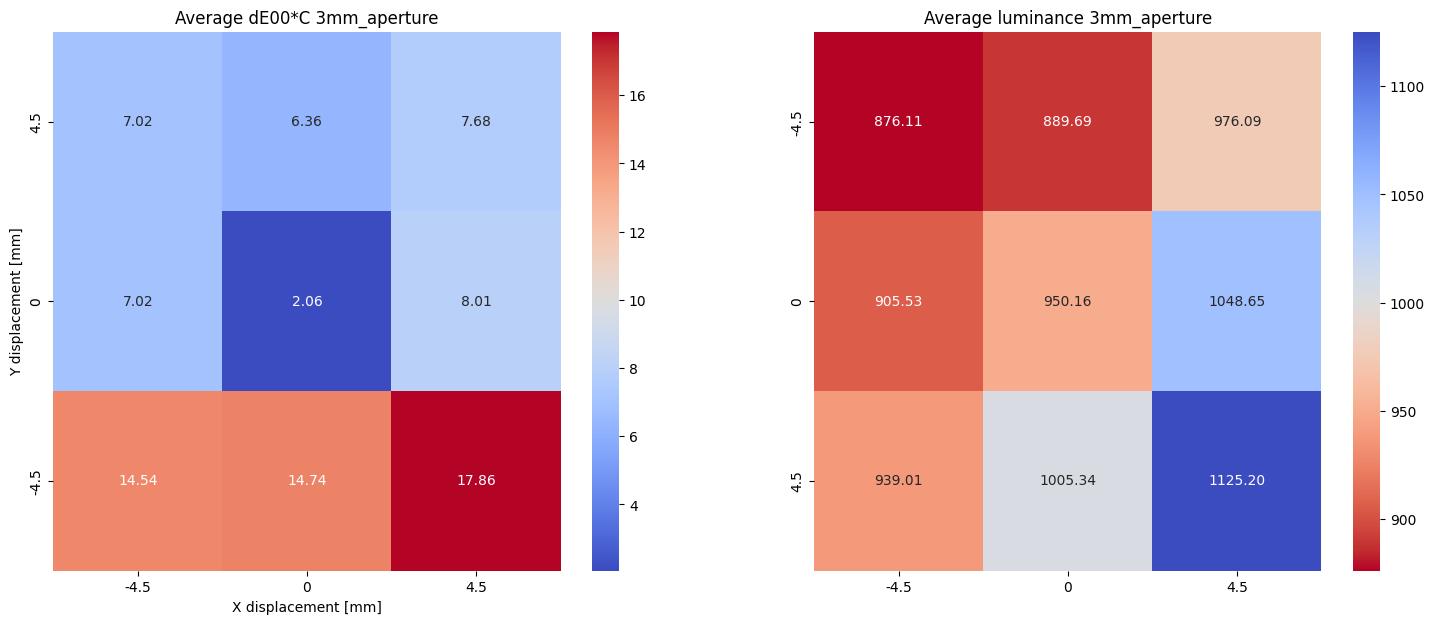

In [46]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
data = pd.read_csv(r"C:\Users\ryanchu\Documents\projects\JRIQT\Output\20250507\2Y0YB6MH27000N_3mm_aperture.csv")
data["Pupil"] = data["capture_name"].apply(lambda x: x.split("_")[3])
grouped_dE = data.groupby("Pupil")["dE00*C"].mean()
grouped_Y = data.groupby("Pupil")["Y"].mean()
display(grouped_Y)

de = grouped_dE.to_numpy()
Y = grouped_Y.to_numpy()
de = np.reshape(de,(3,3))
Y = np.reshape(Y,(3,3))

plt.figure(2,figsize=(18,7))
plt.subplot(121)
sb.heatmap(de,
           annot=True, 
           fmt = '.2f',
           cmap="coolwarm",    
           xticklabels=[-4.5,0,4.5], 
           yticklabels=[4.5,0,-4.5])

plt.title('Average dE00*C 3mm_aperture')
plt.ylabel('Y displacement [mm]')
plt.xlabel('X displacement [mm]')

plt.subplot(122)
sb.heatmap( Y,
            annot=True,
            fmt = '.2f',
            cmap='coolwarm_r',
            xticklabels=[-4.5,0,4.5],
            yticklabels=[-4.5,0,4.5]
            )
plt.title('Average luminance 3mm_aperture')

Text(0.5, 1.0, 'Average luminance')

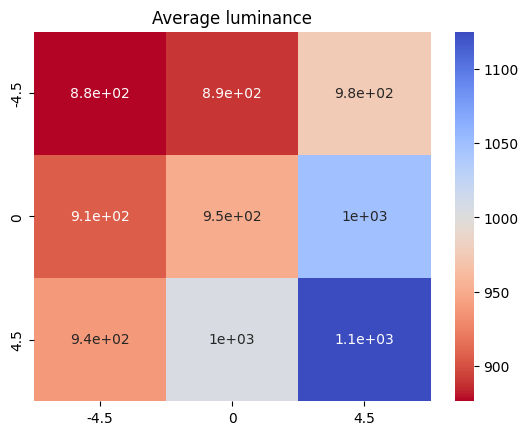

In [28]:

plt.subplots(121)
sb.heatmap( Y,
            annot=True,
            cmap='coolwarm_r',
            xticklabels=[-4.5,0,4.5],
            yticklabels=[-4.5,0,4.5]
            )
plt.title('Average luminance')

Pupil
1     835.614376
2     866.780339
3     939.392814
4     899.061725
5     949.582375
6    1022.329355
7     869.451857
8     931.169519
9    1010.468963
Name: Y, dtype: float64

Text(0.5, 1.0, '2Y0YB6MH270012_Doublet Average luminance')

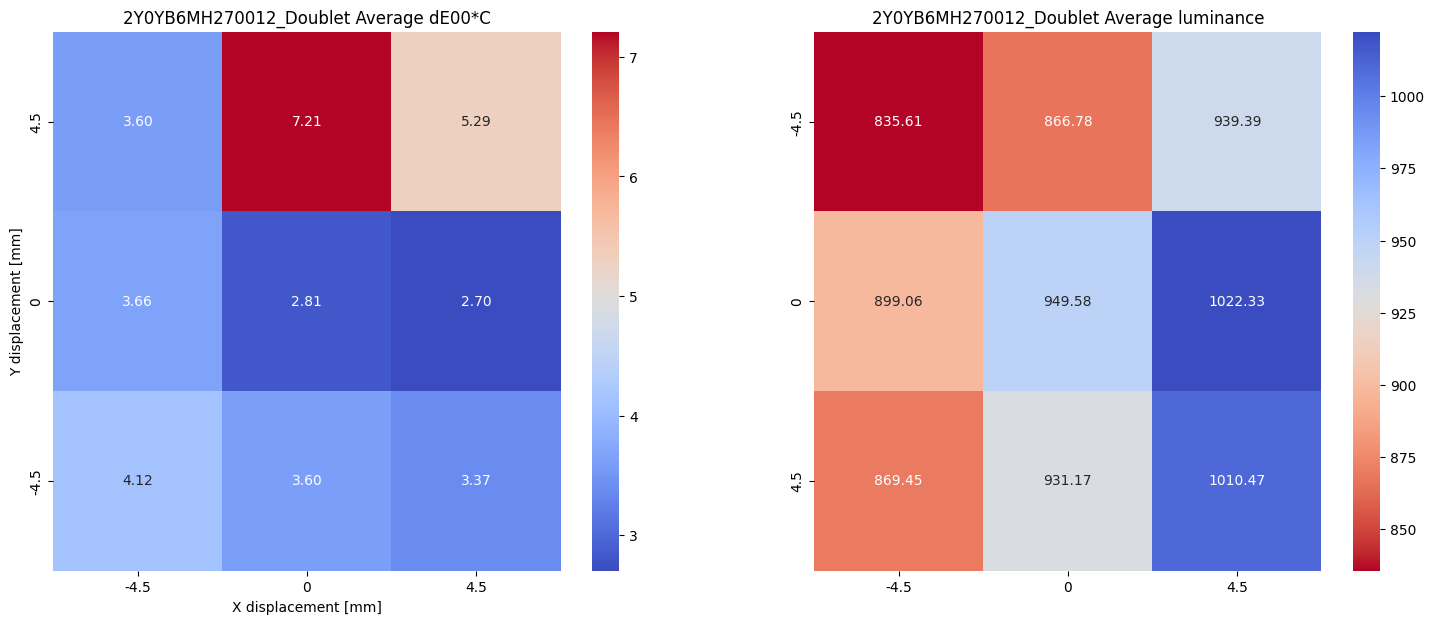

In [50]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\ryanchu\Documents\projects\JRIQT\Output\20250507\2Y0YB6MH270012_Doublet.csv")
data["Pupil"] = data["capture_name"].apply(lambda x: x.split("_")[3])
grouped_dE = data.groupby("Pupil")["dE00*C"].mean()
grouped_Y = data.groupby("Pupil")["Y"].mean()
display(grouped_Y)

de = grouped_dE.to_numpy()
Y = grouped_Y.to_numpy()
de = np.reshape(de,(3,3))
Y = np.reshape(Y,(3,3))

plt.figure(2,figsize=(18,7))
plt.subplot(121)
sb.heatmap(de,
           annot=True, 
           fmt = '.2f',
           cmap="coolwarm",    
           xticklabels=[-4.5,0,4.5], 
           yticklabels=[4.5,0,-4.5])

plt.title('2Y0YB6MH270012_Doublet Average dE00*C')
plt.ylabel('Y displacement [mm]')
plt.xlabel('X displacement [mm]')

plt.subplot(122)
sb.heatmap( Y,
            annot=True,
            fmt = '.2f',
            cmap='coolwarm_r',
            xticklabels=[-4.5,0,4.5],
            yticklabels=[-4.5,0,4.5]
            )
plt.title('2Y0YB6MH270012_Doublet Average luminance')


Pupil
1     814.134405
2     832.800898
3     912.952946
4     909.070926
5     949.022198
6    1026.857706
7     838.746445
8     898.838456
9     991.484168
Name: Y, dtype: float64

Text(0.5, 1.0, '2Y0YB6MH270012_3mm_aperture Average luminance')

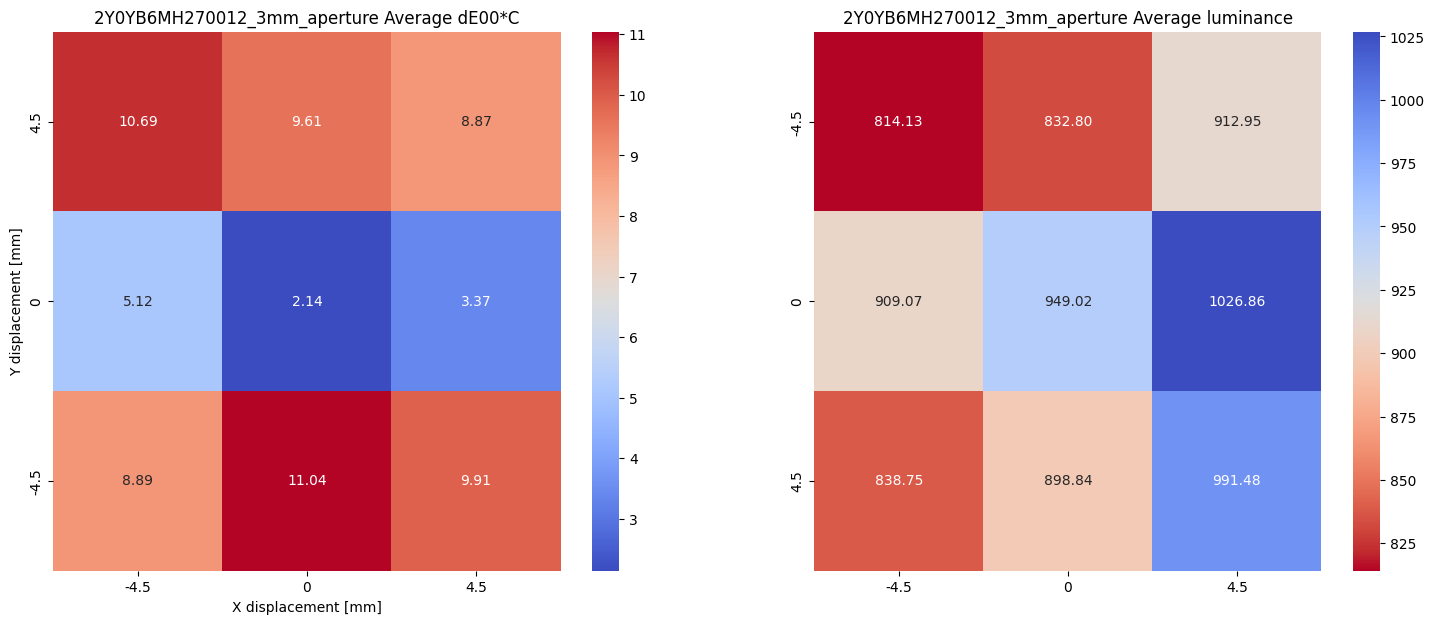

In [54]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\ryanchu\Documents\projects\JRIQT\Output\20250507\2Y0YB6MH270012_3mm_aperture.csv")
data["Pupil"] = data["capture_name"].apply(lambda x: x.split("_")[3])
grouped_dE = data.groupby("Pupil")["dE00*C"].mean()
grouped_Y = data.groupby("Pupil")["Y"].mean()
display(grouped_Y)

de = grouped_dE.to_numpy()
Y = grouped_Y.to_numpy()
de = np.reshape(de,(3,3))
Y = np.reshape(Y,(3,3))

plt.figure(2,figsize=(18,7))
plt.subplot(121)
sb.heatmap(de,
           annot=True, 
           fmt = '.2f',
           cmap="coolwarm",    
           xticklabels=[-4.5,0,4.5], 
           yticklabels=[4.5,0,-4.5])

plt.title('2Y0YB6MH270012_3mm_aperture Average dE00*C')
plt.ylabel('Y displacement [mm]')
plt.xlabel('X displacement [mm]')

plt.subplot(122)
sb.heatmap( Y,
            annot=True,
            fmt = '.2f',
            cmap='coolwarm_r',
            xticklabels=[-4.5,0,4.5],
            yticklabels=[-4.5,0,4.5]
            )
plt.title('2Y0YB6MH270012_3mm_aperture Average luminance')

In [17]:
import pandas as pd
import numpy as np
import os

folder = r"C:\Users\ryanchu\Documents\projects\JRIQT\Output\20250220"
files = [os.path.join(folder,file) for file in os.listdir(folder) if 'csv' in file]
df = pd.DataFrame()
for f in files:
    df1 = pd.read_csv(f)
    df = pd.concat([df,df1])
df = df.sort_values("capture_name")
df = df.drop(columns=df.columns[0])
display(df)
# df.to_csv('repeatSummary.csv',index=False)

,capture_name,X,Y,Z,L*,a*,b*,dE00*C
3,solid_blue_pupil_1,164.18703,28.171313,871.33201,100.0,415.168618,-410.242096,41.160868
3,solid_blue_pupil_1,164.04410,28.089188,869.70375,100.0,415.793753,-410.455516,41.163666
3,solid_blue_pupil_1,163.96135,28.068677,869.19769,100.0,415.862718,-410.485720,41.164002
3,solid_blue_pupil_1,165.48056,28.402159,877.56003,100.0,415.073002,-410.030847,41.159700
3,solid_blue_pupil_1,164.28409,28.286119,871.36055,100.0,414.108851,-409.422025,41.154209
...,...,...,...,...,...,...,...,...
32,solid_white_pupil_9,892.81813,942.063770,1082.85570,100.0,-0.481666,-3.644834,3.427550
32,solid_white_pupil_9,894.70432,944.064580,1085.13700,100.0,-0.483533,-3.643675,3.427032
32,solid_white_pupil_9,895.09026,936.605270,1081.34100,100.0,0.911049,-3.944498,3.823836
32,solid_white_pupil_9,893.92121,943.107000,1082.27680,100.0,-0.460359,-3.533435,3.329013


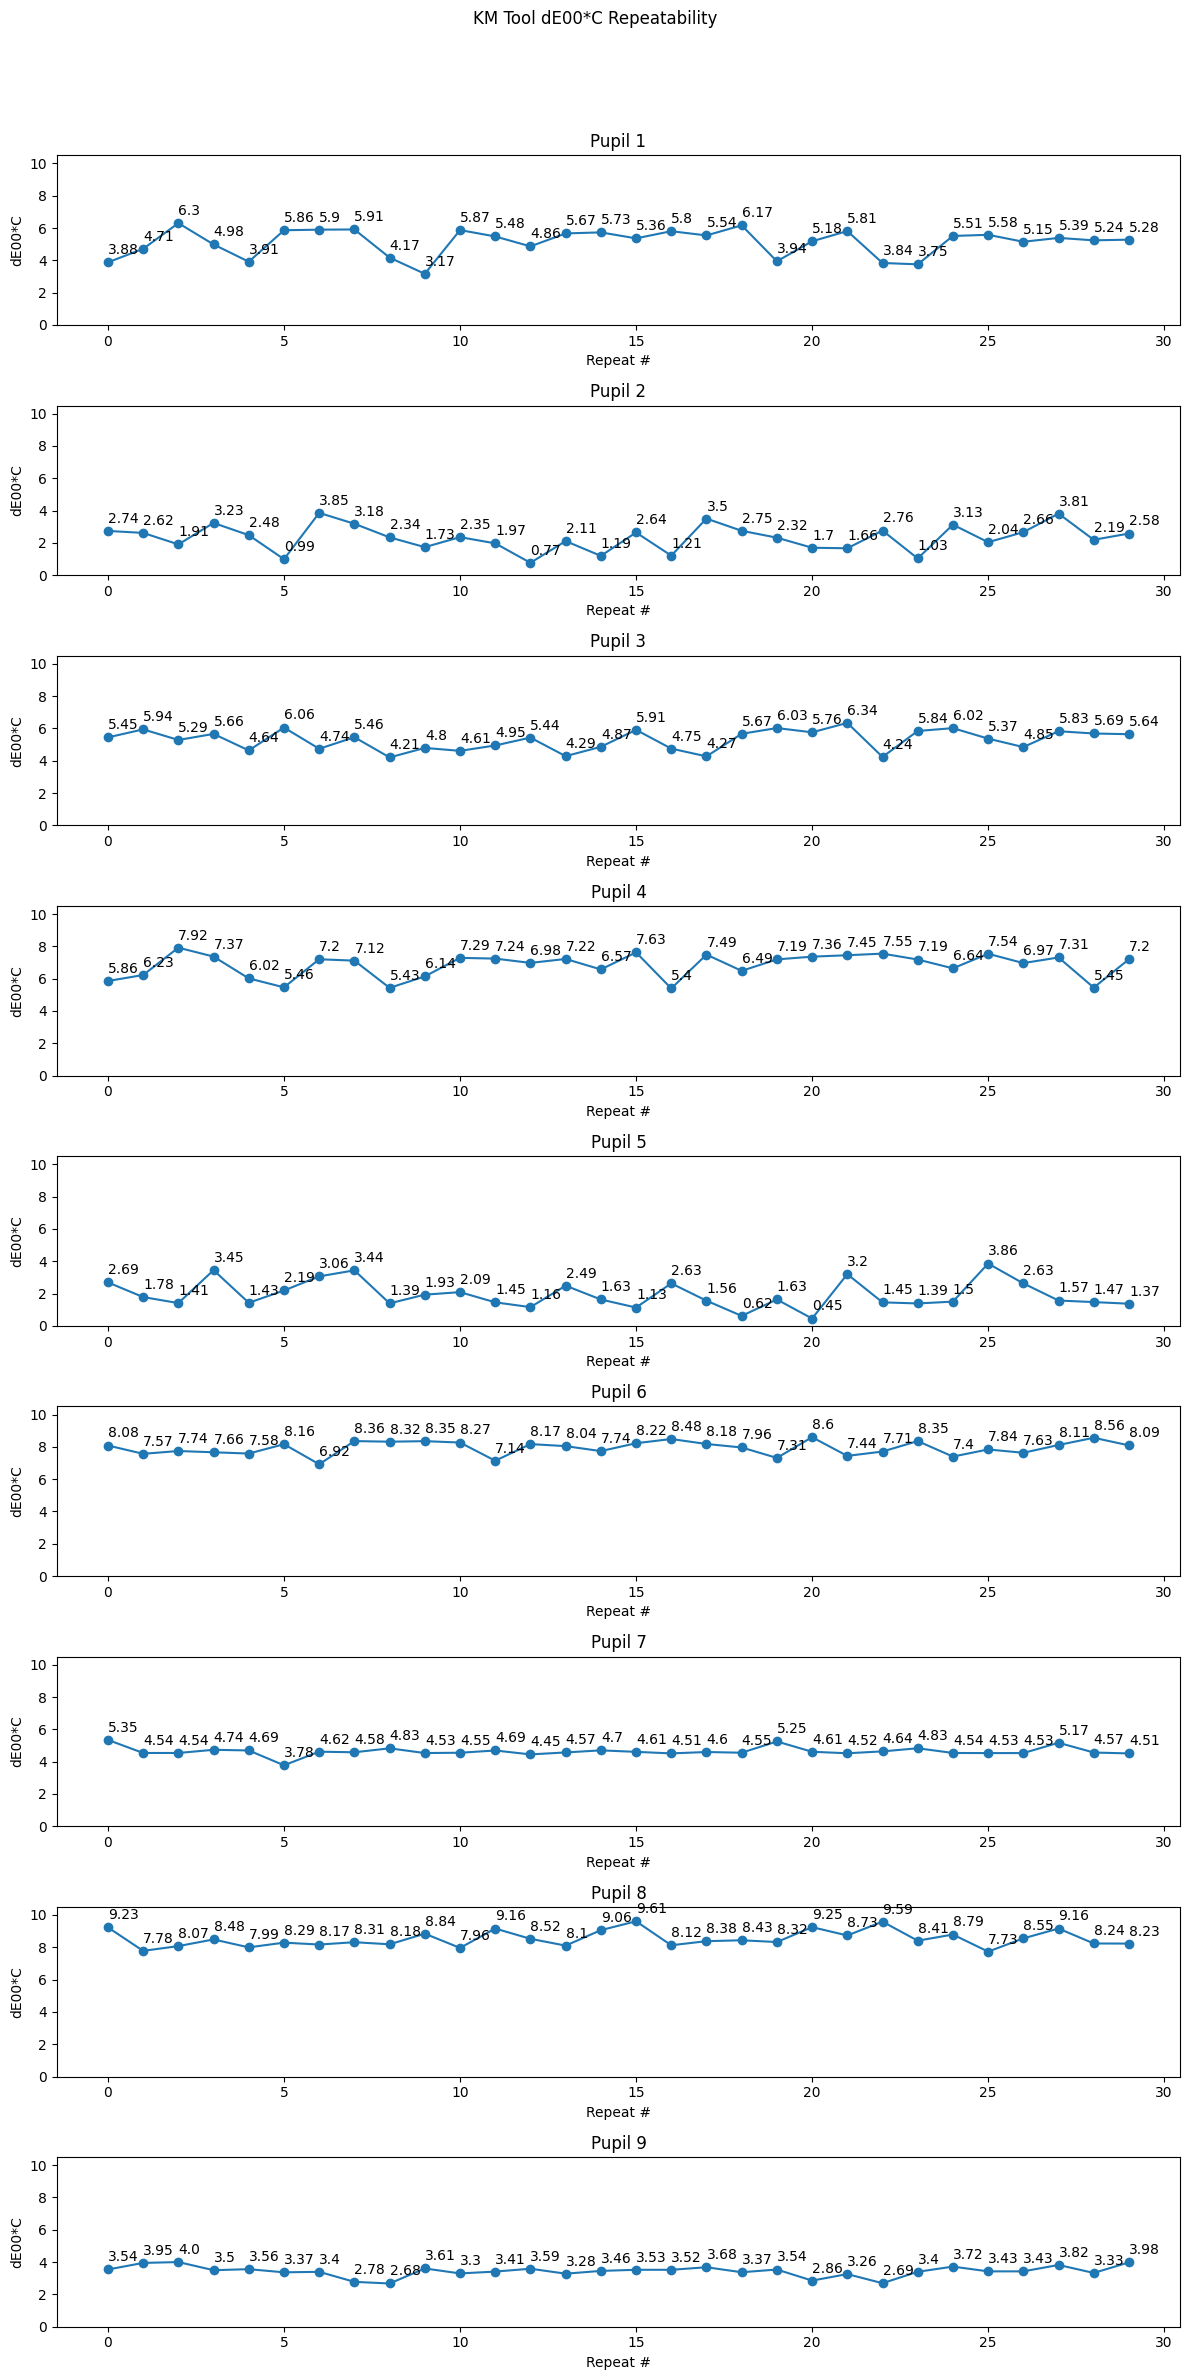

In [40]:
whiteData = df[df['capture_name'].str.contains('white')]
import matplotlib.pyplot as plt

fig, axs = plt.subplots(9,figsize=(12,25))
plt.suptitle("KM Tool dE00*C Repeatability")

for i in range(1,10):
    pupilData = whiteData[whiteData['capture_name'].str.contains(str(i))]['dE00*C'].to_numpy()
    # print(pupilData)
    ax = axs[i-1]
    ax.plot(range(len(pupilData)),pupilData,"o-")
    for j in range(len(pupilData)):
        ax.annotate(str(round(pupilData[j],2)),xy=(j,pupilData[j]+0.5))
    ax.set_title(f"Pupil {i}")
    ax.set_xlabel("Repeat #")
    ax.set_ylabel("dE00*C")
    ax.set_ylim((0,10.5))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    

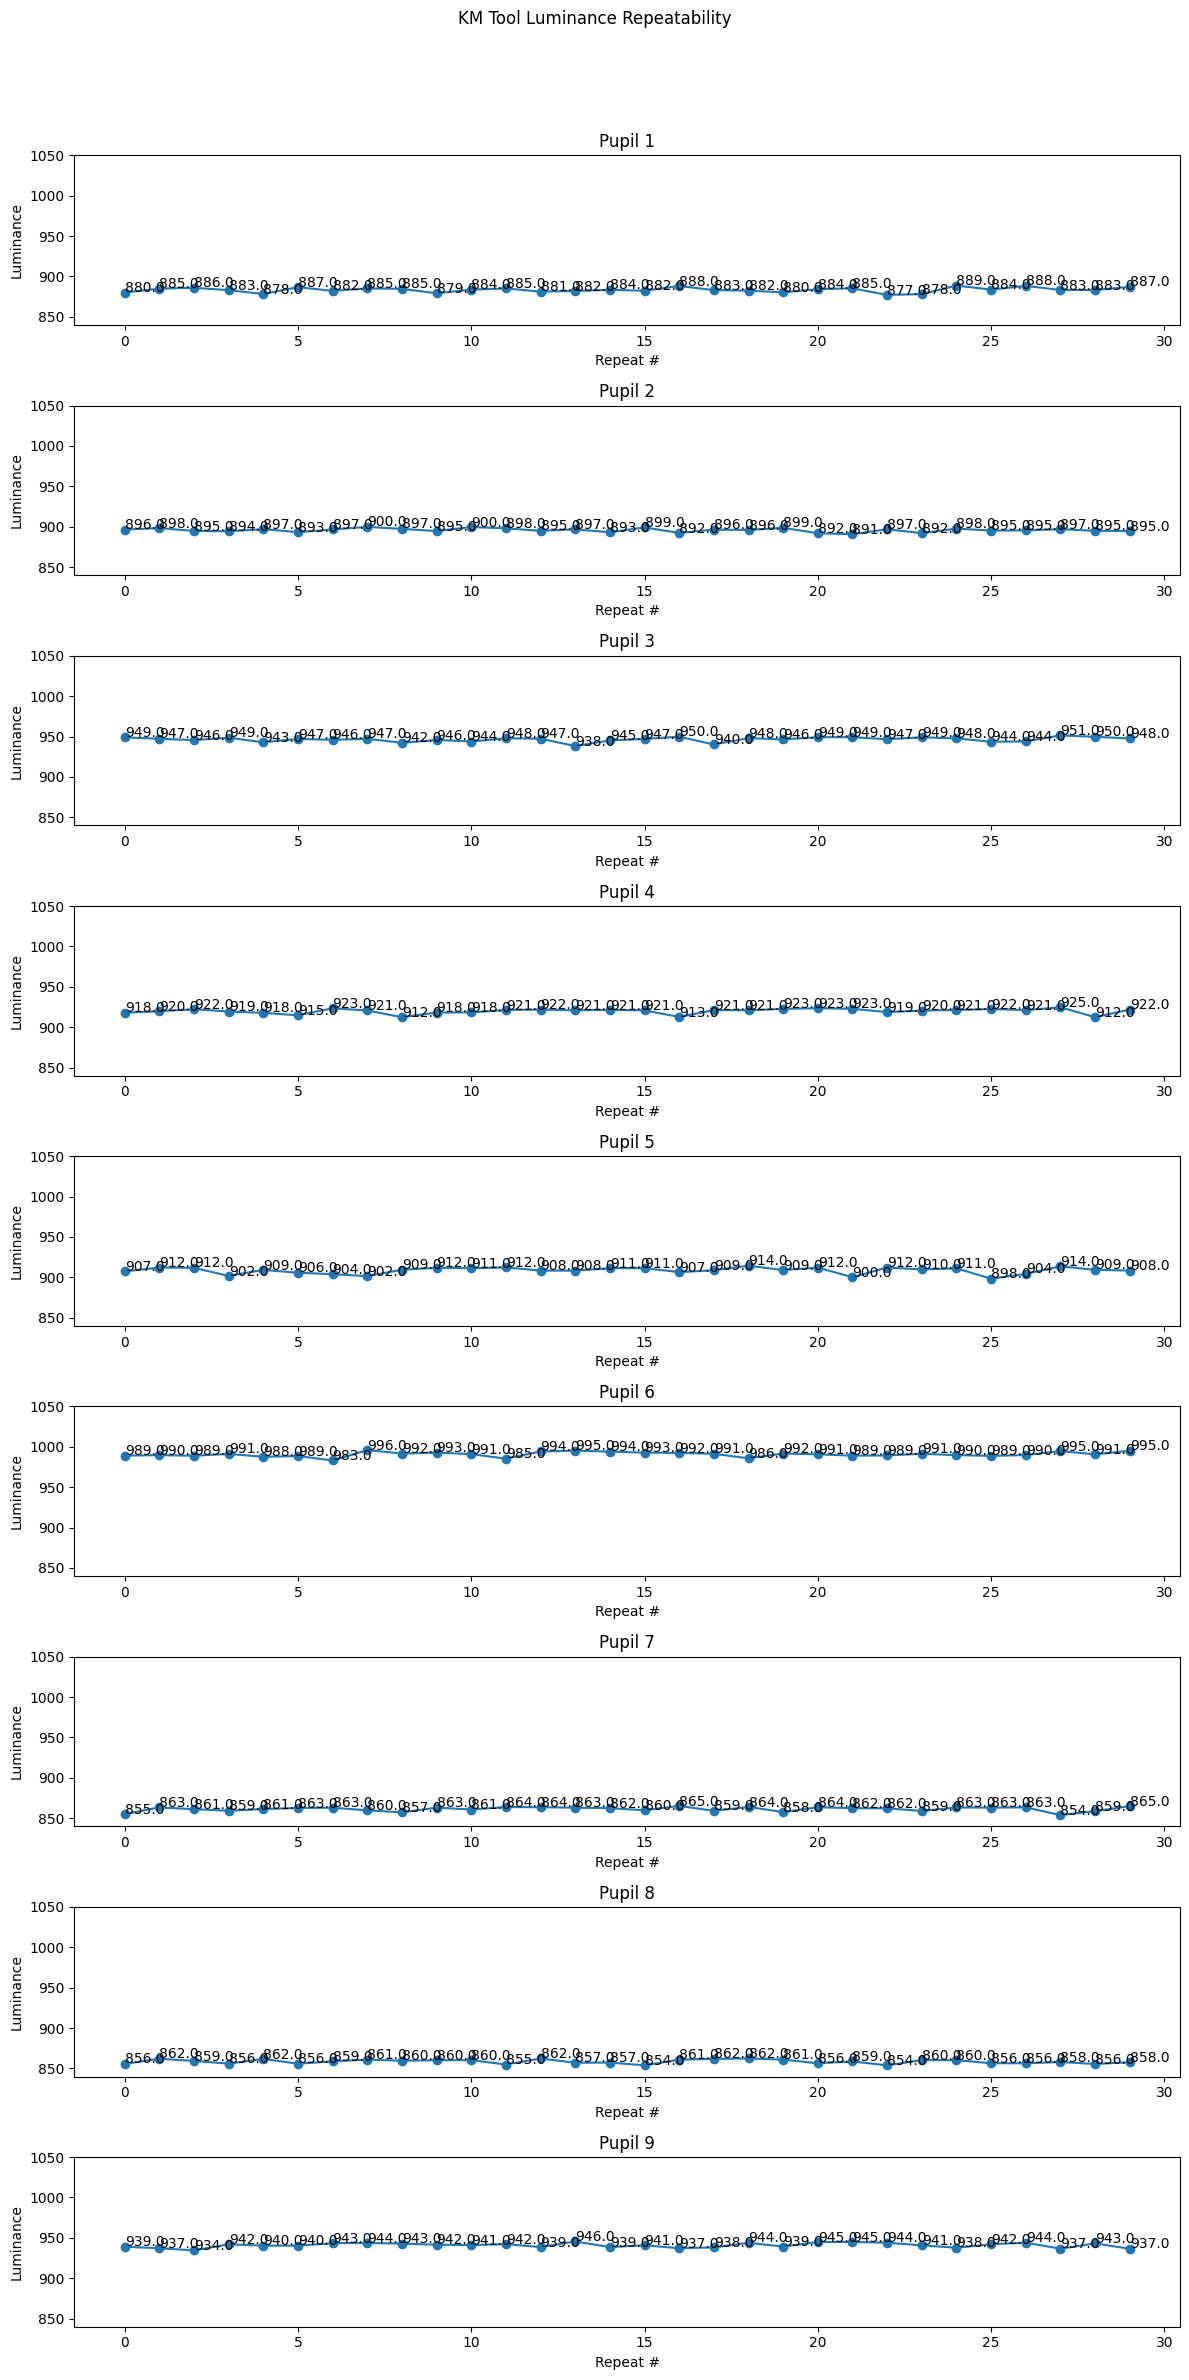

In [43]:
fig, axs = plt.subplots(9,figsize=(12,25))
plt.suptitle("KM Tool Luminance Repeatability")
for i in range(1,10):
    pupilData = whiteData[whiteData['capture_name'].str.contains(str(i))]['Y'].to_numpy()
    # print(pupilData)
    ax = axs[i-1]
    ax.plot(range(len(pupilData)),pupilData,"o-")
    for j in range(len(pupilData)):
        ax.annotate(str(round(pupilData[j],0)),xy=(j,pupilData[j]+0.5))
    ax.set_title(f"Pupil {i}")
    ax.set_xlabel("Repeat #")
    ax.set_ylabel("Luminance")
    ax.set_ylim((840,1050))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



True

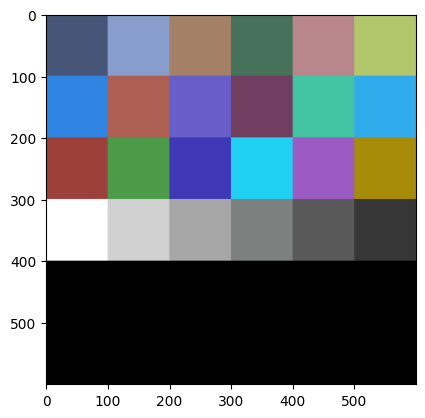

In [63]:
import cv2
im = cv2.imread(r"Z:\IQT3-System\Devices\HN_EVT2\2Y0YB6MH27000N-Cal\2Y0YB6MH27000N_Macbeth Sequence_macbeth_color_reference.png")
im = ((im/np.max(im))*255).astype(np.uint8)

em = np.zeros((600,600,3),dtype = np.uint8)
em[:400,:600] = im[:400,:600] 
import matplotlib.pyplot as plt
plt.imshow(em)
cv2.imwrite(r"Z:\IQT3-System\Devices\HN_EVT2\2Y0YB6MH27000N-Cal\2Y0YB6MH27000N_Macbeth Sequence_macbeth_color_reference_project.png",em)


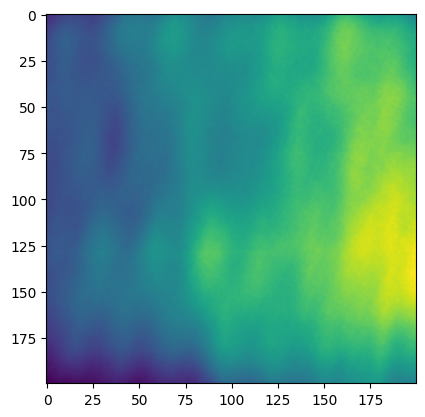

In [45]:
import os
import cv2
X = cv2.imread(r"C:\Users\ryanchu\Desktop\dark skin_X.tif",-1)
Y = cv2.imread(r"C:\Users\ryanchu\Desktop\dark skin_Y.tif",-1)
Z = cv2.imread(r"C:\Users\ryanchu\Desktop\dark skin_Z.tif",-1)
plt.imshow(Y[420:620,700:900])
illuminantX = cv2.imread(r"C:\Users\ryanchu\Desktop\illuminant_X.tif",-1)
illuminantY = cv2.imread(r"C:\Users\ryanchu\Desktop\illuminant_Y.tif",-1)
illuminantZ = cv2.imread(r"C:\Users\ryanchu\Desktop\illuminant_Z.tif",-1)

In [47]:
import skimage as ski
croppedStack = np.dstack((X[420:620,700:900],Y[420:620,700:900],Z[420:620,700:900]))
croppedStackIlluminant = np.dstack((illuminantX[420:620,700:900],illuminantY[420:620,700:900],illuminantZ[420:620,700:900]))
croppedIlluminantY = illuminantY[420:620,700:900]

origShape = croppedStack.shape
croppedNormRGB = np.zeros(origShape)
croppedNormRGBIlluminant = np.zeros(origShape)
for i in range(origShape[0]):
    for j in range(origShape[1]):
        croppedNormRGB[i,j,:] = ski.color.xyz2rgb(croppedStack[i,j,:] / croppedIlluminantY[i,j])
        croppedNormRGBIlluminant[i,j,:] =  ski.color.xyz2rgb(croppedStackIlluminant[i,j,:] / croppedIlluminantY[i,j])

        


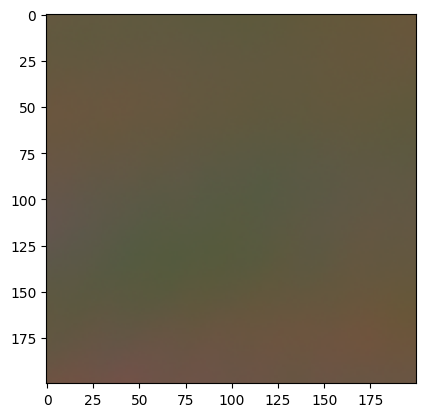

In [49]:
plt.imshow((croppedNormRGB*255).astype(np.uint8))


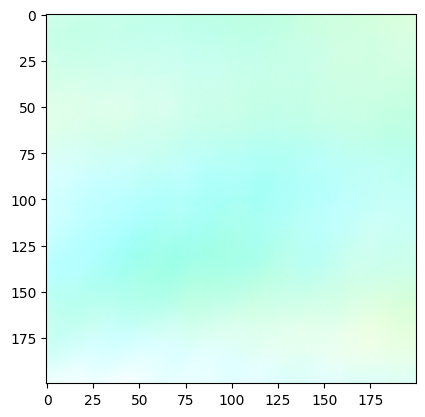

In [50]:
plt.imshow((croppedNormRGBIlluminant*255).astype(np.uint8))

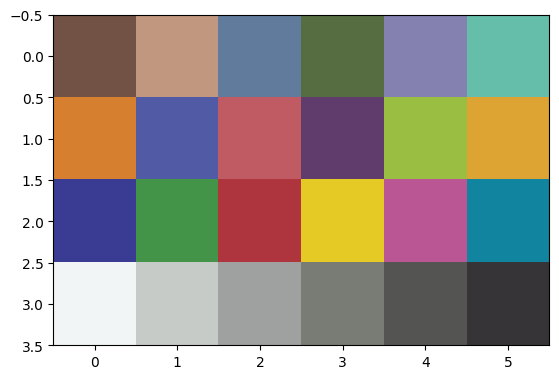

In [44]:
import skimage as ski
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\ryanchu\Documents\projects\CalibrationCode\output\2Y0YB6MH27000N_20250005\07\2513H00M20S\Gamma\Macbeth_Validation.csv")

Ls = data["L"].to_numpy()
As = data["a"].to_numpy()
Bs = data["b"].to_numpy()
RGB = np.zeros((len(Ls)-1,3))
for i in range(len(Ls)-1):
    RGB[i] = ski.color.lab2rgb((Ls[i],As[i],Bs[i]))
colors = np.reshape((RGB*255).astype(np.uint8),(4,6,3))
plt.imshow(colors)
